In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st

In [2]:
# Load the data
uber_file = "uber.csv"
# Read the Dataframe
uber_file_df = pd.read_csv(uber_file) 
# show the dataframe
uber_file_df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
# Rename the column
uber_file_df.rename(columns = {uber_file_df.columns[0]:"id"}, inplace = True)
uber_file_df.columns[0]
# Display sample data
uber_file_df.head()

,id,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
# Checking the shape of data
uber_file_df.shape

(200000, 9)

In [5]:
# Delete column "Key"
del uber_file_df["key"]

In [6]:
# Delete rows  with 0 longitude and longitude value

df2 = uber_file_df[ (uber_file_df['pickup_longitude'] == 0) & (uber_file_df['pickup_latitude'] == 0) & (uber_file_df['dropoff_longitude'] == 0) & (uber_file_df['dropoff_latitude'] == 0)].index
uber_file_df.drop(df2 , inplace=True)


uber_file_df.head(15)

,id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
5,44470845,4.9,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1
6,48725865,24.5,2014-10-12 07:04:00 UTC,-73.961447,40.693965,-73.871195,40.774297,5
8,15822268,9.7,2012-02-17 09:32:00 UTC,-73.975187,40.745767,-74.002720,40.743537,1
9,50611056,12.5,2012-03-29 19:06:00 UTC,-74.001065,40.741787,-73.963040,40.775012,1
10,2205147,6.5,2015-05-22 17:32:27 UTC,-73.974388,40.746952,-73.988586,40.729805,1


In [7]:
# Drop N/A values in the dataset
uber_file_df = uber_file_df.dropna(how='any')
# Checking the shape of data after changes
uber_file_df.shape

(196412, 8)

In [8]:
# Delete rows  with 0 passengers and fare amount value
uber_file_df.drop(uber_file_df[uber_file_df['passenger_count'] == 0].index, inplace = True)
uber_file_df.drop(uber_file_df[uber_file_df['passenger_count'] == 208].index, inplace = True)
uber_file_df.drop(uber_file_df[uber_file_df['fare_amount'] < 1].index, inplace = True)

In [9]:
# Checking the shape of data after changes
uber_file_df.shape

(195696, 8)

In [10]:
# Creating new columns Month Date Day Hour Day of week
uber_file_df['pickup_datetime'] = pd.to_datetime(uber_file_df['pickup_datetime'])

uber_file_df['Year'] = uber_file_df['pickup_datetime'].apply(lambda time: time.year)
uber_file_df['Date'] = uber_file_df['pickup_datetime'].apply(lambda time: time.day)
uber_file_df['Hour'] = uber_file_df['pickup_datetime'].apply(lambda time: time.hour)
uber_file_df['Month'] = uber_file_df['pickup_datetime'].apply(lambda time: time.month)
uber_file_df['Day of Week'] = uber_file_df['pickup_datetime'].apply(lambda time: time.dayofweek)
uber_file_df['Day of Week_number'] = uber_file_df['pickup_datetime'].apply(lambda time: time.dayofweek)
uber_file_df['counter'] = 1

days = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
uber_file_df['Day of Week'] = uber_file_df['Day of Week'].map(days)

In [11]:
uber_file_df.drop(uber_file_df[uber_file_df['Year'] == 2015].index, inplace = True)
year_counts = uber_file_df["Year"].value_counts()
year_counts

2012    31465
2011    30825
2013    30691
2009    30187
2010    29555
2014    29399
Name: Year, dtype: int64

In [12]:
# Calculatin the distance between the pickup and drop co-ordinates using the Haversine formual for accuracy
def haversine_np(lon1, lat1, lon2, lat2):
    
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [13]:
uber_file_df['Distance']= haversine_np(uber_file_df['pickup_longitude'],uber_file_df['pickup_latitude'],
                             uber_file_df['dropoff_longitude'],uber_file_df['dropoff_latitude'])
# Rounding the values for better analysis
uber_file_df['Distance'] = uber_file_df['Distance'].astype(float).round(1)

In [14]:
uber_file_df.head()


,id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Date,Hour,Month,Day of Week,Day of Week_number,counter,Distance
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,17,20,7,Fri,4,1,2.5
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,24,21,8,Mon,0,1,5.0
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,26,8,6,Fri,4,1,1.7
4,17610152,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,28,17,8,Thu,3,1,4.5
5,44470845,4.9,2011-02-12 02:27:09+00:00,-73.969019,40.755910,-73.969019,40.755910,1,2011,12,2,2,Sat,5,1,0.0


Text(0, 0.5, 'fare_amount')

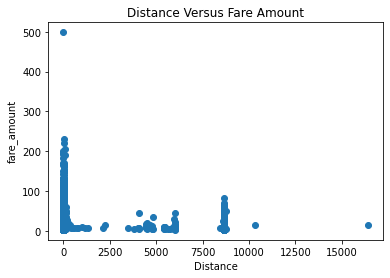

In [15]:
# Create a scater plot Distance vs Fare Amount
plt.scatter(uber_file_df['Distance'], uber_file_df['fare_amount'])
plt.title('Distance Versus Fare Amount')
plt.xlabel("Distance")
plt.ylabel("fare_amount")

Scatter plot shows trips with distances greater than 100km are outliers, so we should to remove them. Probably  the lat & lon entered were incorrect in such trips.
Also is necessary to remove trips with 0 distance travelled and rows with mismatched fair amount & distance travelled.

In [16]:
# Removing rows
uber_file_df.drop(uber_file_df[uber_file_df['Distance'] > 100].index, inplace = True)
uber_file_df.drop(uber_file_df[uber_file_df['Distance'] == 0].index, inplace = True)

In [17]:
uber_file_df.drop(uber_file_df[(uber_file_df['fare_amount']>100) & (uber_file_df['Distance']<1)].index, inplace = True )

In [18]:
# Checking the shape of data after changes
uber_file_df.shape

(178914, 16)

Text(0, 0.5, 'fare_amount')

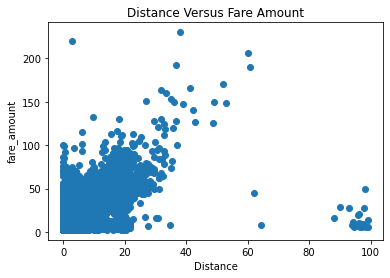

In [19]:
# Create a scater plot Distance vs Fare Amount after changes done on data frame
plt.scatter(uber_file_df['Distance'], uber_file_df['fare_amount'])
plt.title('Distance Versus Fare Amount')
plt.xlabel("Distance")
plt.ylabel("fare_amount")

After the changes the scatter plot looks more suitable. We can see that most of the fares are in distance beetwen 1 km - 40 km. 

Total fares number per year: 
[2009, 2010, 2011, 2012, 2013, 2014] [29575, 28991, 30207, 30846, 30300, 28995]


Text(0.5, 1.0, 'Total fares number per year')

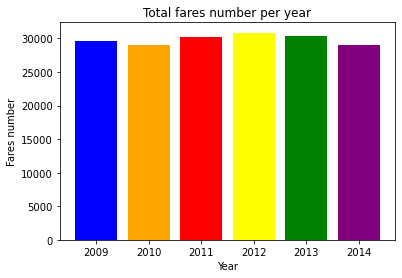

In [20]:
# Calculate total  fares number per year 
number_of_fares = []

year = [2009, 2010, 2011, 2012, 2013, 2014]

colors = ['blue', 'orange', 'red', 'yellow', 'green', 'purple']
for i in range(2009, 2015):
    x = uber_file_df.loc[uber_file_df['Year'] == i, 'counter'].sum()
    number_of_fares .append(x)

print("Total fares number per year: ")
print(year, number_of_fares )

# Create bar chart and  set the xlabel and ylabel

plt.bar(year, number_of_fares , color=colors)
plt.xlabel("Year")
plt.ylabel("Fares number")
plt.title("Total fares number per year")

The total fares number per year are similar each year. 
The biggest number of fares was in 2012. 
The smallest number is in 2015. This could be cause by not full year data provided in 2015. 


Total fares number per Month: 
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] [29575, 28991, 30207, 30846, 30300, 28995]


Text(0.5, 1.0, 'Total fares number per Month')

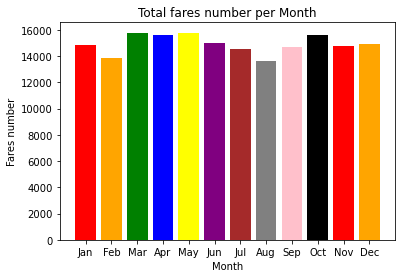

In [21]:
# Calculate total  fares number  per month
no_of_fares = []
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

colors = ['red', 'orange', 'green', 'blue', 'yellow',
          'purple', 'brown', 'grey', 'pink', 'black']

for i in range(1, 13):
    x = uber_file_df.loc[uber_file_df['Month'] == i, 'counter'].sum()
    no_of_fares.append(x)

print("Number of trips per Month: ")
print(month, number_of_fares )

# Create bar chart and  set the xlabel and ylabel

plt.bar(month, no_of_fares, color=colors)
plt.xlabel("Month")
plt.ylabel("Fares number")
plt.title("Total fares number per Month")

The smallest total of fares per month is in July and August. 
Probaly this is because of summer holiday and people are going away from the city. 
Also the weather is very good so probably people prefer to walk.
The biggest number are beetwen March and May. 
This can suggest that when Spring starts people are going out more than in Winter time, but the weather is still not so warm like in the summer so people booking uber. 

Total fares number by Days: 
['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] [22541, 25186, 26040, 26929, 27635, 26997, 23586]


Text(0.5, 1.0, 'Total fares number by day')

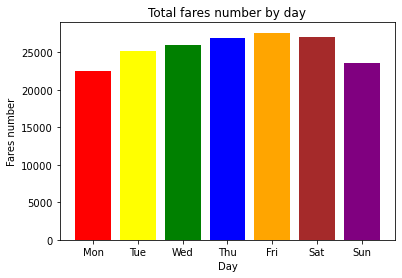

In [22]:
# Calculate total  fares number  per day
num_of_fares = []
day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

colors = ['red', 'yellow', 'green', 'blue', 'orange',
          'brown', 'purple']

for i in range(0, 7):
    x = uber_file_df.loc[uber_file_df['Day of Week_number'] == i, 'counter'].sum()
    num_of_fares.append(x)

print("Total fares number by Days: ")
print(day, num_of_fares)

# Create bar chart and  set the xlabel and ylabel

plt.bar(day, num_of_fares, color=colors)
plt.xlabel("Day")
plt.ylabel("Fares number")
plt.title("Total fares number by day")


The most busy days are Fridays and Saturdays. 
This suggest that people choose to book uber more on weekends when going out than on others weekdays.

Total fares number per pick up hour: 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23] [7020, 5285, 3976, 2923, 2114, 1728, 3640, 6468, 8162, 8345, 8061, 8381, 8859, 8949, 8755, 8602, 7364, 8752, 10840, 11256, 10578, 10214, 9899, 8743]


Text(0.5, 1.0, 'Total fares number per pick up hour')

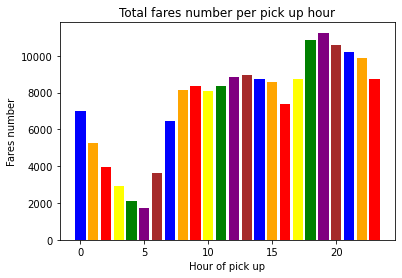

In [23]:
# Calculate total  fares number per pick up hour (00:00 - 23:00) 
number_of_fares = []

hour = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

colors = ['blue', 'orange', 'red', 'yellow', 'green', 'purple', 'brown', 'blue', 'orange', 'red', 'yellow', 'green', 'purple', 'brown', 'blue', 'orange', 'red', 'yellow', 'green', 'purple', 'brown', 'blue', 'orange', 'red']
for i in range(0, 24):
    x = uber_file_df.loc[uber_file_df['Hour'] == i, 'counter'].sum()
    number_of_fares .append(x)

print("Total fares number per pick up hour: ")
print(hour, number_of_fares )

# Create bar chart and  set the xlabel and ylabel

plt.bar(hour, number_of_fares , color=colors)
plt.xlabel("Hour of pick up")
plt.ylabel("Fares number")
plt.title("Total fares number per pick up hour")

From the chart above we see that the most busy pick up hours are evening hours between 18:00 - 22:00.

Total fares number by passengers: 
['1', '2', '3', '4', '5', '6'] [123995, 26594, 8028, 3867, 12780, 3650]


Text(0.5, 1.0, 'Total fares number per number of passengers')

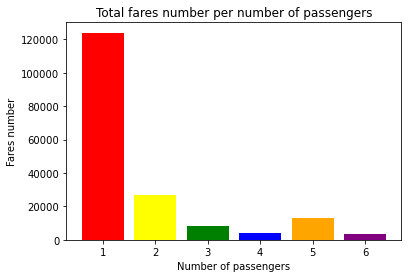

In [24]:
# Calculate total  fares number  per number of passengers
num_of_fares = []
passengers = ['1', '2', '3', '4', '5', '6']

colors = ['red', 'yellow', 'green', 'blue', 'orange',
         'purple']

for i in range(1, 7):
    x = uber_file_df.loc[uber_file_df['passenger_count'] == i, 'counter'].sum()
    num_of_fares.append(x)

print("Total fares number by passengers: ")
print(passengers, num_of_fares)

# Create bar chart and  set the xlabel and ylabel

plt.bar(passengers, num_of_fares, color=colors)
plt.xlabel("Number of passengers")
plt.ylabel("Fares number")
plt.title("Total fares number per number of passengers")

The above charts show that for most trips is one passenger. The smallest number of trips are trips with 4 or 6 passengers. 

In [35]:
# Calculate number of fares based on year and month 
year_trips = uber_file_df.groupby(['Year','Month']).agg(  
    no_of_trips = ('counter','count'),
    Average_fair = ('fare_amount','mean'),
    Total_fair = ('fare_amount','sum'),
    Average_passenger = ('passenger_count','mean'),
    Avg_distance = ( 'Distance', 'mean')).reset_index()

year_trips['avg_no_of_trips'] = year_trips['no_of_trips']/30

year_trips['month_year'] = year_trips['Month'].astype(str) +", "+ year_trips['Year'].astype(str)

year_trips = year_trips.reset_index()

year_trips.head()

,index,Year,Month,no_of_trips,Average_fair,Total_fair,Average_passenger,Avg_distance,avg_no_of_trips,month_year
0,0,2009,1,2462,9.555118,23524.70,1.662063,3.122949,82.066667,"1, 2009"
1,1,2009,2,2228,9.639856,21477.60,1.687612,3.119524,74.266667,"2, 2009"
2,2,2009,3,2627,10.085097,26493.55,1.702322,3.252189,87.566667,"3, 2009"
3,3,2009,4,2496,10.071314,25138.00,1.644631,3.306771,83.200000,"4, 2009"
4,4,2009,5,2578,10.021703,25835.95,1.671451,3.314934,85.933333,"5, 2009"


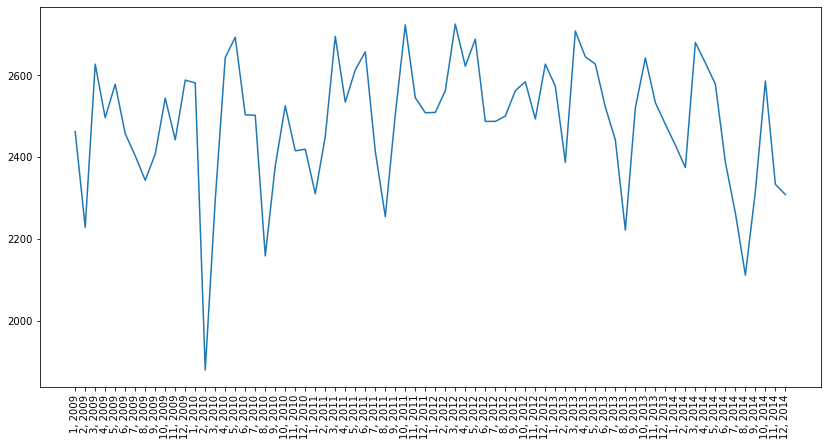

In [53]:
plt.figure(figsize=(14,7))
x_axis = year_trips["month_year"]
y_axis = year_trips["no_of_trips"]

plt.xticks(rotation=90)

plt.plot(x_axis, y_axis, )

plt.show()

In [26]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Average_fair')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
   
    plt.show()


The r-squared is: 0.5378406508727541
The correlation between both factors is 0.73


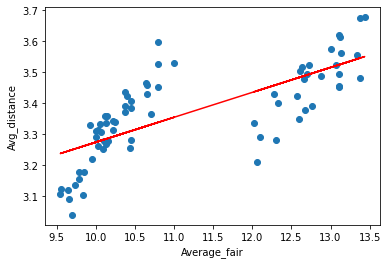

In [27]:
# Avg_distance vs. Average_fair Linear Regression Plot
x_values = year_trips["Average_fair"]
y_values = year_trips["Avg_distance"]
plot_linear_regression(x_values, y_values, 'Avg_distance',(1,20))

There is a strong positive correlation between average distance  and average fair amount. 
This make sense as the distance of trip increase, the price of the trip increase.
This suggests price can act as a key decesion making point while booking an uber.

In [28]:
average_year_fare = uber_file_df.groupby(["Year"]).mean()["fare_amount"]
average_year_fare

Year
2009     9.948071
2010    10.082907
2011    10.350007
2012    11.188282
2013    12.668783
2014    12.954848
Name: fare_amount, dtype: float64

In [29]:
average_year_dist = uber_file_df.groupby(["Year"]).mean()["Distance"]
cost_per_km = average_year_fare/ average_year_dist
cost_per_km

Year
2009    3.064750
2010    3.083310
2011    3.098371
2012    3.255084
2013    3.659310
2014    3.735277
dtype: float64

Text(0, 0.5, 'cost per km')

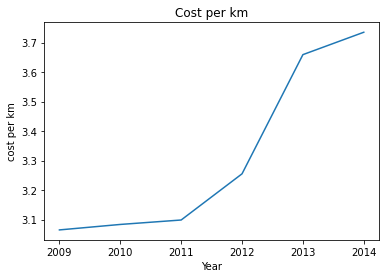

In [30]:
plt.plot(cost_per_km)
plt.title("Cost per km")
plt.xlabel("Year")
plt.ylabel("cost per km")

we can see an increase of price per km as the years increase, 
we think that this can be from fuel prices going up and an increase in wages 

The correlation between distance and the fare amount in 2012 is 0.91


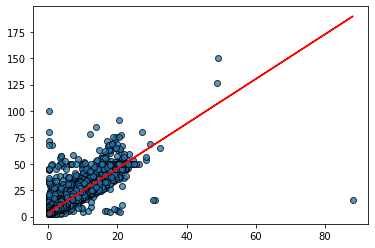

In [31]:
year_df = uber_file_df[uber_file_df["Year"] == 2011]
x_axis = year_df["Distance"]
y_axis = year_df["fare_amount"]
correlation = st.pearsonr(x_axis, y_axis)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black", alpha=0.75)
print(f"The correlation between distance and the fare amount in 2012 is {round(correlation[0],2)}")

In [32]:
uber_file_df.head()

,id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Date,Hour,Month,Day of Week,Day of Week_number,counter,Distance
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,17,20,7,Fri,4,1,2.5
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,24,21,8,Mon,0,1,5.0
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,26,8,6,Fri,4,1,1.7
4,17610152,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,28,17,8,Thu,3,1,4.5
6,48725865,24.5,2014-10-12 07:04:00+00:00,-73.961447,40.693965,-73.871195,40.774297,5,2014,12,7,10,Sun,6,1,11.7


In [33]:
years_list = [2009, 2010, 2011, 2012, 2013, 2014]

dist_list = []
for y in years_list:
    int_series = uber_file_df.loc[uber_file_df["Year"] == y]["fare_amount"]
    dist_list.append(int_series)
    Q1 = int_series.quantile([.25])[.25]
    Q3 = int_series.quantile([.75])[.75]
    iqr =  Q3 - Q1
    upper_bound = Q3 + 1.5 * iqr
    lower_bound = Q1 - 1.5 * iqr
    outlier = int_series.loc[(int_series > upper_bound) | (int_series < lower_bound)]
    print(y, ":", outlier)


2009 : 74        19.30
99        26.90
113       35.30
196       24.00
223       23.70
          ...  
199776    36.50
199820    19.30
199891    31.47
199897    33.87
199997    30.90
Name: fare_amount, Length: 2333, dtype: float64
2010 : 204       45.00
339       35.70
423       37.47
427       49.57
494       23.70
          ...  
199757    45.00
199805    45.00
199882    49.57
199885    22.90
199972    45.00
Name: fare_amount, Length: 2263, dtype: float64
2011 : 30        25.7
98        30.9
205       20.1
315       45.0
366       49.8
          ... 
199562    32.1
199635    20.9
199674    49.8
199937    28.1
199976    49.7
Name: fare_amount, Length: 2487, dtype: float64
2012 : 82        26.1
162       29.0
202       23.0
226       49.8
495       25.7
          ... 
199699    28.1
199700    24.1
199756    30.0
199790    23.7
199977    43.5
Name: fare_amount, Length: 2506, dtype: float64
2013 : 310       39.33
348       29.30
418       37.50
570       57.33
610       57.33
          .

<function matplotlib.pyplot.show(close=None, block=None)>

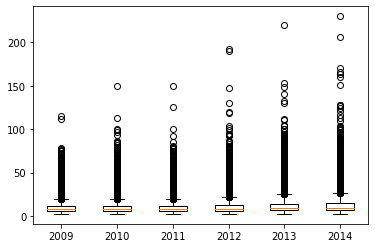

In [34]:
plt.boxplot(dist_list, labels = years_list)
plt.show